#### Overview:
I was given the task of analyzing the Movie Lens 100k (ml-100k) dataset to produce interesting insight about the data.  
Following were my findings:
1. [IMDb "Top 25" (Sorted by IMDb Rating Descending)](#1.-IMDb-"Top-25"-(Sorted-by-IMDb-Rating-Descending))
2. [Which age group tends to rate movies more](#2.-Which-age-group-tends-to-rate-movies-more)
3. [How Different age groups like the Top 25 movies](#3.-How-Different-age-groups-like-the-Top-25-movies)
4. [Which movies are favored more by Men vs Women](#4.-Which-movies-are-favored-more-by-Men-vs-Women)
5. [How consistent are the ratings over time?](#5.-How-consistent-are-the-ratings-over-time?)
6. [How quickly does the Movie and User base grow over time?](#6.-How-quickly-does-the-Movie-and-User-base-grow-over-time?)

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [111]:
# Create User, Ratings and Movie dataframes
user_col_list = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users_df = pd.read_csv('u.user', sep='|', names=user_col_list, encoding='latin-1')

# u.item file contains columns that specify Genres which we don't need so we'll only load the first 5 columns
movie_col_list = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies_df = pd.read_csv('u.item', sep='|', names=movie_col_list, encoding='latin-1', usecols=range(5))

rating_col_list = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_df = pd.read_csv('u.data', sep='\t', names=rating_col_list, encoding='latin-1')

# Combine the above dataframes so we get the merged dataset
movies_ratings_df = pd.merge(movies_df, ratings_df)
imdb_dataset_df = pd.merge(movies_ratings_df, users_df)
lens = imdb_dataset_df

# 1. IMDb "Top 25" (Sorted by IMDb Rating Descending)

IMDb is known for it's list of Top 250 movies. Hence let's get the top 25 movies from the dataset

In [112]:
movie_stats_df = imdb_dataset_df.groupby('title').agg({'rating': [np.size, np.mean]})
# We'll only take into picture the movies that have been rated at least 200 times
# since there are movies that have been rated only once but still have 5 stars
atleast_200 = movie_stats_df['rating']['size'] >= 200
movie_stats_df[atleast_200].sort_values([('rating', 'mean')], ascending=False)[:25]

rating          
                                         size      mean
title                                                  
Schindler's List (1993)                   298  4.466443
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
Godfather, The (1972)                     413  4.283293
Raiders of the Lost Ark (1981)            420  4.252381
Titanic (1997)                            350  4.245714
Empire Strikes Back, The (1980)           367  4.204360
Boot, Das (1981)                          201  4.203980
Godfather: Part II, The (1974)            209  4.186603
Princess Bride, The (1987)                324  4.172840
Amadeus (1984)                            276  4.163043
L.A. Confidential (1997)                  297  4.161616
Fargo (1996)                              508  4.155512
Braveheart (1995)                         297  4.151515
Blade Runner (1982)                       275  4.138182
It's a Wonderful Life (1946)              231  4.121212
Graduate, The (1967)                      239  4.104603
Psycho (1960)                             239  4.100418
Wizard of Oz, The (1939)                  246  4.077236

**Analysis: Schindler's List is the top rated movie for this dataset!**  
<br>  


# 2. Which age group tends to rate movies more

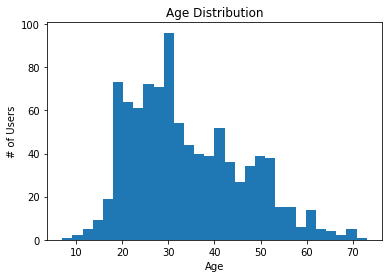

In [113]:
users_df.age.plot.hist(bins=30, figsize=(6,4))
plt.title("Age Distribution")
plt.ylabel('# of Users')
plt.xlabel('Age');
# This Histogram show age is distributed among the users in the dataset

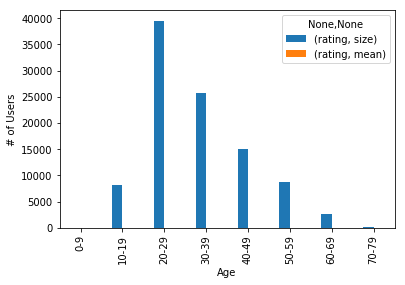

In [114]:
# But instead of comparing Individual ages, it's better to bucket them in groups
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
imdb_dataset_df['age_group'] = pd.cut(imdb_dataset_df.age, range(0, 81, 10), right=False, labels=labels)
imdb_dataset_df[['age', 'age_group']].drop_duplicates()[:10]

imdb_dataset_df.groupby('age_group').agg({'rating': [np.size, np.mean]}).plot.bar(figsize=(6,4))
plt.ylabel('# of Users')
plt.xlabel('Age');

#### Analysis: 20 & 30 year olds seems to rate movies a lot more than the other age groups
<br>  


# 3. How Different age groups like the Top 25 movies

In [115]:
# Create filtered Dataset
top_10 = imdb_dataset_df.groupby('movie_id').size().sort_values(ascending=False)[:10]
imdb_dataset_df.set_index('movie_id', inplace=True)

In [116]:
by_age = imdb_dataset_df.loc[top_10.index].groupby(['title', 'age_group'])
# by_age.head(1)

,title,release_date,video_release_date,imdb_url,user_id,rating,timestamp,age,gender,occupation,zip_code,age_group
movie_id,,,,,,,,,,,,
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,308,5,887737431,60,M,retired,95076,60-69
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,287,5,875334271,21,M,salesman,31211,20-29
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,148,5,877016805,33,M,engineer,97006,30-39
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,158,4,880133306,50,M,educator,27606,50-59
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,232,4,880062302,45,M,scientist,99709,40-49
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,246,5,884920788,19,M,student,28734,10-19
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,30,3,875061066,7,M,student,55436,0-9
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,481,4,885827974,73,M,retired,37771,70-79
258,Contact (1997),11-Jul-1997,NaN,http://us.imdb.com/Title?Contact+(1997/I),66,4,883601089,23,M,student,80521,20-29


In [117]:
by_age.rating.mean().head(15)

title                        age_group
Air Force One (1997)         10-19        3.647059
                             20-29        3.666667
                             30-39        3.570000
                             40-49        3.555556
                             50-59        3.750000
                             60-69        3.666667
                             70-79        3.666667
Contact (1997)               0-9          5.000000
                             10-19        3.693878
                             20-29        3.785714
                             30-39        3.847458
                             40-49        3.866667
                             50-59        3.739130
                             60-69        3.777778
English Patient, The (1996)  0-9          5.000000
Name: rating, dtype: float64

In [118]:
age_plot = by_age.rating.mean().unstack(1).fillna(0)
age_plot

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Contact (1997),5.0,3.693878,3.785714,3.847458,3.866667,3.739130,3.777778,0.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Independence Day (ID4) (1996),0.0,3.595238,3.291429,3.389381,3.718750,3.888889,2.750000,0.000000
Liar Liar (1997),4.0,3.191489,3.321244,3.080645,2.916667,3.000000,3.100000,2.000000
Return of the Jedi (1983),4.0,4.488372,4.067308,3.805970,4.000000,4.000000,3.333333,5.000000
Scream (1996),0.0,3.784615,3.669767,3.250000,2.774194,3.000000,3.555556,0.000000
Star Wars (1977),3.0,4.630435,4.413043,4.305732,4.166667,4.469388,4.000000,4.000000


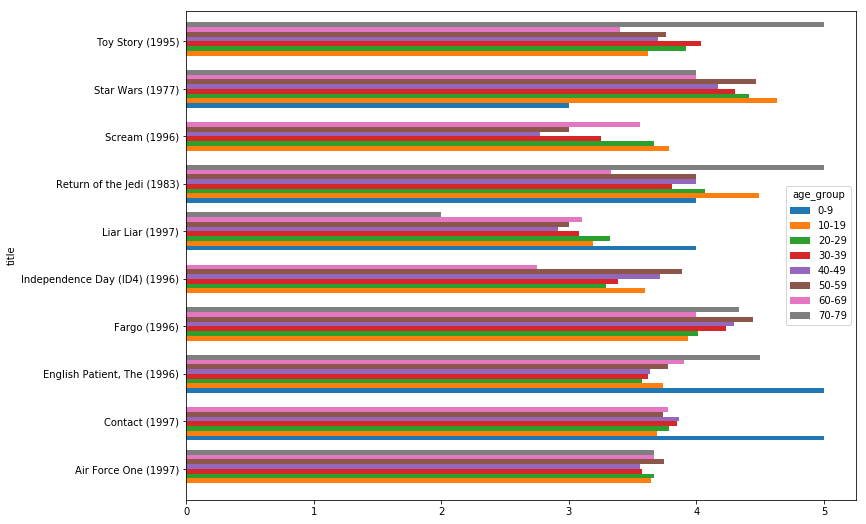

In [119]:
age_plot.plot.barh(figsize=(12,9), width=0.8)

#### Analysis: The 70 year olds seemed to have loved Toy Story!

# 4. Which movies are favored more by Men vs Women

In [120]:
imdb_dataset_df.reset_index('movie_id', inplace=True)
imdb_dataset_df.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,timestamp,age,gender,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


In [121]:
pivoted = imdb_dataset_df.pivot_table(index=['movie_id', 'title'],
                           columns=['gender'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,gender,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [122]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,gender,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


<function matplotlib.pyplot.savefig(*args, **kwargs)>

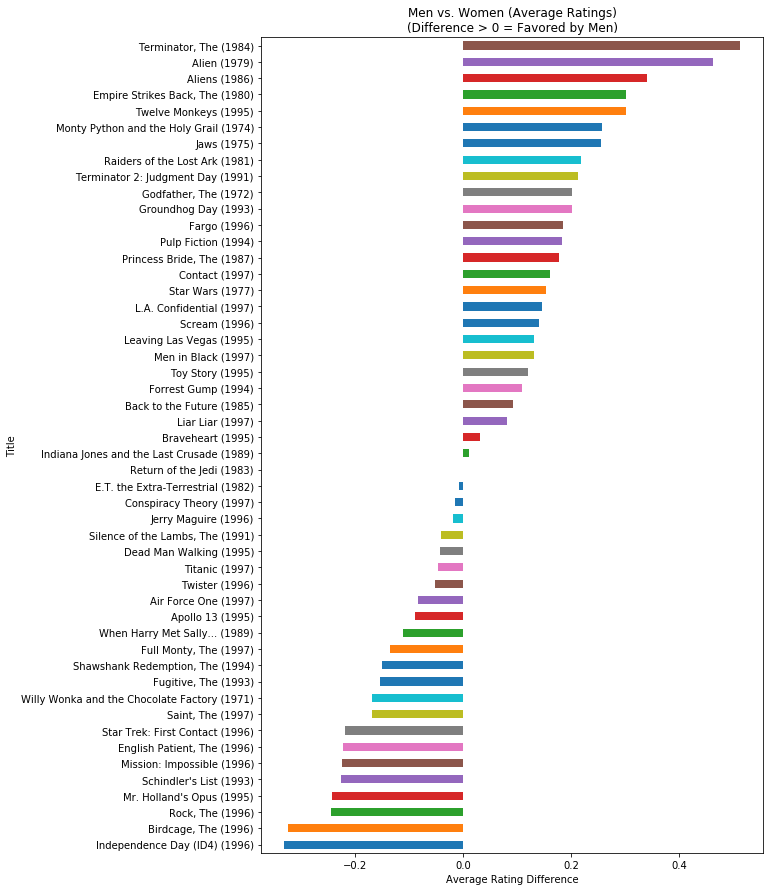

In [123]:
top_50 = imdb_dataset_df.groupby('movie_id').size().sort_values(ascending=False)[:50]
pivoted.reset_index('movie_id', inplace=True)
disagreements = pivoted[pivoted.movie_id.isin(top_50.index)]['diff']
disagreements.sort_values().plot.barh(figsize=[9, 15], width=0.5)
plt.title('Men vs. Women (Average Ratings)\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');
plt.savefig

#### Analysis: Men likes Action movies whereas women like Drama and Thriller
<br>  


# 5. How consistent are the ratings over time?

First, I'd like to see what ratings are common and uncommon

In [124]:
norm_counts = (
    ratings_df['rating']
    .value_counts(normalize=True, sort=False)
    .multiply(100)
)
norm_counts.head()

1     6.110
2    11.370
3    27.145
4    34.174
5    21.201
Name: rating, dtype: float64

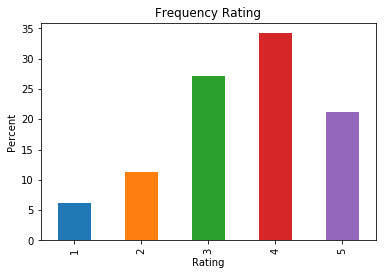

In [125]:
norm_counts.plot.bar()
plt.title("Frequency Rating")
plt.ylabel('Percent')
plt.xlabel('Rating');
plt.show()

Here 3 and 4 are the most common ratings, which is expected

Secondly, I'd like to know how many ratings are submitted per month

In [126]:
ratings_df['timestamp'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
ratings_df['year'] = ratings_df['timestamp'].dt.year
ratings_df['month'] = ratings_df['timestamp'].dt.month

month_counts = ratings_df[['year', 'month', 'rating']].groupby(['year', 'month']).count()
month_counts = month_counts.rename(index=str, columns={'rating': '# of Ratings'})
month_counts.head()

# of Ratings
year month              
1997 9              6808
     10            10368
     11            24073
     12            11695
1998 1             14100

In [127]:
month_counts = month_counts.reset_index()
month_counts.head()

,year,month,# of Ratings
0,1997,9,6808
1,1997,10,10368
2,1997,11,24073
3,1997,12,11695
4,1998,1,14100


In [128]:
# Get a consistent date
month_counts['Date'] = month_counts[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)
month_counts.head()

,year,month,# of Ratings,Date
0,1997,9,6808,1997-09-01
1,1997,10,10368,1997-10-01
2,1997,11,24073,1997-11-01
3,1997,12,11695,1997-12-01
4,1998,1,14100,1998-01-01


,year,month,# of Ratings
Date,,,
1997-09-01,1997,9,6808
1997-10-01,1997,10,10368
1997-11-01,1997,11,24073
1997-12-01,1997,12,11695
1998-01-01,1998,1,14100
1998-02-01,1998,2,10961
1998-03-01,1998,3,12953
1998-04-01,1998,4,9042


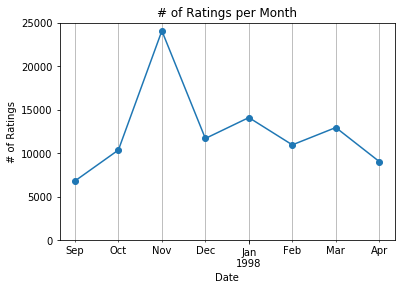

In [129]:
month_counts = month_counts.set_index('Date')
display(month_counts)

# Plot the graph
month_counts['# of Ratings'].plot(style='o-')
plt.ylabel('# of Ratings')
plt.title('# of Ratings per Month')
plt.ylim([0, 25000])
plt.gca().grid(which='minor')
plt.show()

November has an unexpected sudden spike.

Now let's find if the ratings are consistent over time.

In [130]:
month_counts = ratings_df.groupby(['year', 'month'])['rating'].agg([np.size, np.mean, np.std])
month_counts.head()

size      mean       std
year month                           
1997 9       6808  3.541569  1.091807
     10     10368  3.594425  1.097959
     11     24073  3.558759  1.110674
     12     11695  3.578367  1.110067
1998 1      14100  3.397092  1.187497

,year,month,size,Rating,std
Date,,,,,
1997-09-01,1997,9,6808,3.541569,1.091807
1997-10-01,1997,10,10368,3.594425,1.097959
1997-11-01,1997,11,24073,3.558759,1.110674
1997-12-01,1997,12,11695,3.578367,1.110067
1998-01-01,1998,1,14100,3.397092,1.187497
1998-02-01,1998,2,10961,3.456619,1.128093
1998-03-01,1998,3,12953,3.549062,1.109336
1998-04-01,1998,4,9042,3.575647,1.142669


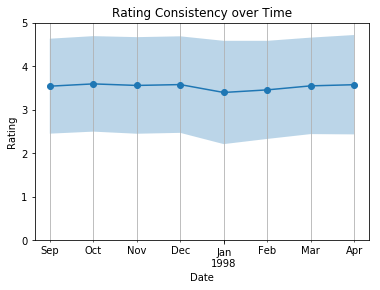

In [131]:
month_counts = month_counts.rename(index=str, columns={'mean': 'Rating'})
month_counts = month_counts.reset_index()
month_counts['Date'] = month_counts[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)

month_counts = month_counts.set_index('Date', drop=True)
display(month_counts)

# Plot it
month_counts['Rating'].plot(style='o-')
plt.fill_between(month_counts.index,
                 month_counts['Rating'] - month_counts['std'],
                 month_counts['Rating'] + month_counts['std'],
                 alpha=0.3,
                )
plt.ylim([0, 5])
plt.ylabel('Rating')
plt.gca().grid(which='minor')
plt.title('Rating Consistency over Time')
plt.show()

#### Analysis: The ratings were quite consistent averaging at about 3.5  

<br>  


# 6. How quickly does the Movie and User base grow over time?

**Assumption is that a user will remain a user right after their first rating.**

In [132]:
ratings_df['Date'] = ratings_df[['year', 'month']].apply(
    lambda x: datetime(year=int(x[0]), month=int(x[1]), day=1), axis=1
)  # Making the Date consistent
display(ratings_df.head())

n_users = []
n_movies = []

dates = np.unique(ratings_df['Date'])  # Get the unique Dates
display(dates)

,user_id,movie_id,rating,timestamp,year,month,Date
0,196,242,3,1997-12-04 10:55:49,1997,12,1997-12-01
1,186,302,3,1998-04-04 15:22:22,1998,4,1998-04-01
2,22,377,1,1997-11-07 02:18:36,1997,11,1997-11-01
3,244,51,2,1997-11-27 00:02:03,1997,11,1997-11-01
4,166,346,1,1998-02-02 00:33:16,1998,2,1998-02-01


array(['1997-09-01T00:00:00.000000000', '1997-10-01T00:00:00.000000000',
       '1997-11-01T00:00:00.000000000', '1997-12-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1998-02-01T00:00:00.000000000',
       '1998-03-01T00:00:00.000000000', '1998-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

,# of Users
Date,
1997-09-01,81
1997-10-01,191
1997-11-01,429
1997-12-01,530
1998-01-01,648


,# of Movies
Date,
1997-09-01,1047
1997-10-01,1240
1997-11-01,1417
1997-12-01,1493
1998-01-01,1567


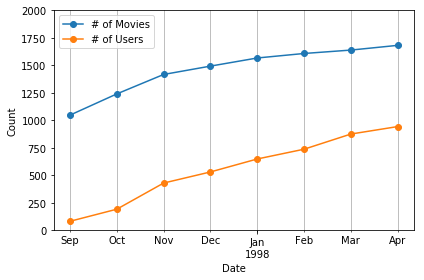

In [133]:
for date in dates:
    # print(date)
    # display(ratings_df[ratings_df['Date'] <= date].head())

    # Assumption is that a user will remain a user right after their first rating.
    # Hence '<=' comparison
    n_users.append(ratings_df[ratings_df['Date'] <= date]['user_id'].nunique())
    n_movies.append(ratings_df[ratings_df['Date'] <= date]['movie_id'].nunique())

df_users = pd.DataFrame({'Date': dates, '# of Users': n_users}).set_index('Date')
display(df_users.head())
df_movies = pd.DataFrame({'Date': dates, '# of Movies': n_movies}).set_index('Date')
display(df_movies.head())

# Plot the Graph
fig, ax = plt.subplots()
df_movies['# of Movies'].plot(style='o-', ax=ax)
df_users['# of Users'].plot(style='o-', ax=ax)
plt.ylabel('Count')
plt.ylim([0, 2000])
ax.grid(which='minor')
plt.tight_layout()
plt.legend()
plt.show()

#### Analysis: Number of users grow rapidly over time